# 1) Network Intrusion Detection

Binary class classification to
predict whether there is an attack or not.

In [14]:
import numpy as np
import pandas as pd

df=pd.read_csv('cicids_static_data.csv')

In [15]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0                 53             159                   2   
1                 53           51673                   2   
2               7496              43                   1   
3              46564              61                   1   
4                 80              69                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        2                           68   
1                        2                           90   
2                        1                            0   
3                        1                            6   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           266                      34   
1                           166                      45   
2                             6                       0   
3                             6                       6   
4                             0                       0   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                      34                     34.0                     0.0   
1                      45                     45.0                     0.0   
2                       0                      0.0                     0.0   
3                       6                      6.0                     0.0   
4                       0                      0.0                     0.0   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     32          0.0          0.0            0   
2  ...                     40          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
4  ...                     20          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0  BENIGN  
1            0        0.0        0.0          0          0  BENIGN  
2            0        0.0        0.0          0          0  ATTACK  
3            0        0.0        0.0          0          0  BENIGN  
4            0        0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             25191 non-null  int64  
 1    Flow Duration                25191 non-null  int64  
 2    Total Fwd Packets            25191 non-null  int64  
 3    Total Backward Packets       25191 non-null  int64  
 4   Total Length of Fwd Packets   25191 non-null  int64  
 5    Total Length of Bwd Packets  25191 non-null  int64  
 6    Fwd Packet Length Max        25191 non-null  int64  
 7    Fwd Packet Length Min        25191 non-null  int64  
 8    Fwd Packet Length Mean       25191 non-null  float64
 9    Fwd Packet Length Std        25191 non-null  float64
 10  Bwd Packet Length Max         25191 non-null  int64  
 11   Bwd Packet Length Min        25191 non-null  int64  
 12   Bwd Packet Length Mean       25191 non-null  float64
 13   

In [17]:
df.shape


(25191, 79)

In [18]:
#!pip install missingno

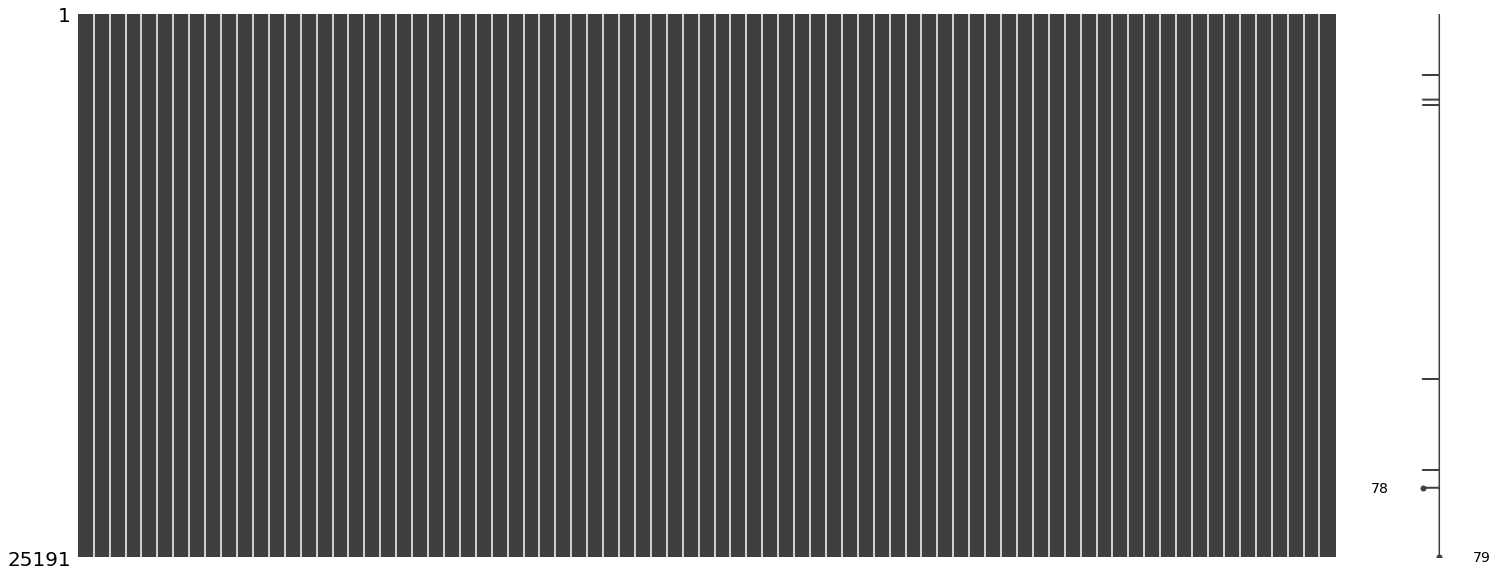

In [19]:
# plot missing values
import missingno as msno
%matplotlib inline
msno.matrix(df);

In [20]:
# remove nans or infinity in numeric columns
df=df[df.select_dtypes(include=[np.number]).ge(0).all(1)]
df = df.replace(' ', np.nan)
df.replace([np.inf, -np.inf], np.nan , inplace=True)
# drop nans and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(11502, 79)

In [22]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
2               7496              43                   1   
3              46564              61                   1   
5                 80        98403702                   7   
7                 80         5421062                   4   
9                443          150960                  23   

    Total Backward Packets  Total Length of Fwd Packets  \
2                        1                            0   
3                        1                            6   
5                        5                          377   
7                        4                          404   
9                       29                          871   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
2                             6                       0   
3                             6                       6   
5                         11595                     377   
7                           557                     392   
9                         42347                     389   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
2                       0                 0.000000                0.000000   
3                       6                 6.000000                0.000000   
5                       0                53.857143              142.492606   
7                       0               101.000000              194.020617   
9                       0                37.869565               97.234629   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
2  ...                     40          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
5  ...                     32        986.0          0.0          986   
7  ...                     20          0.0          0.0            0   
9  ...                     32          0.0          0.0            0   

    Active Min   Idle Mean   Idle Std   Idle Max   Idle Min   Label  
2            0         0.0        0.0          0          0  ATTACK  
3            0         0.0        0.0          0          0  BENIGN  
5          986  98400000.0        0.0   98400000   98400000  ATTACK  
7            0         0.0        0.0          0          0  BENIGN  
9            0         0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

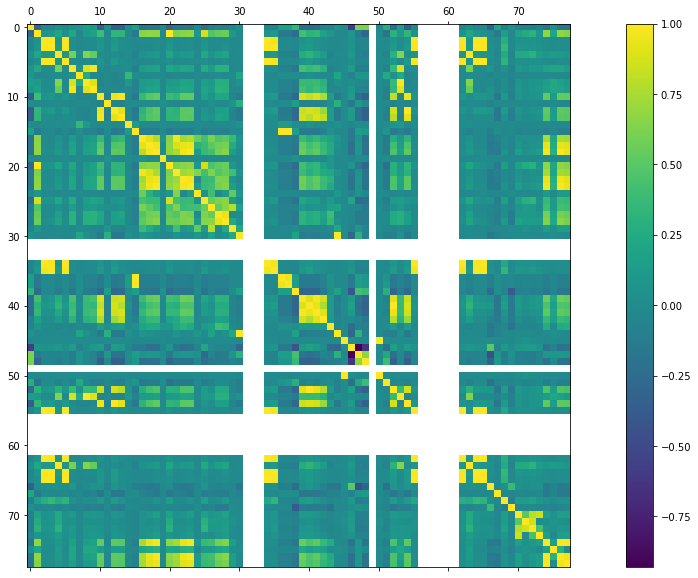

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
fig = plt.figure(figsize=(20,10));
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr());
fig.colorbar(cax);

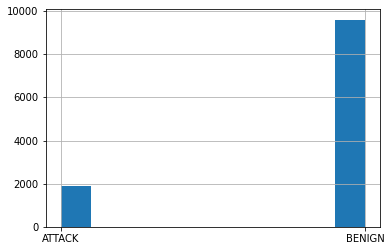

In [25]:
df['Label'].hist();

In [31]:
df.shape

(10502, 79)

In [ ]:
#!pip install imblearn

In [32]:
def smote(X,y):
    '''
    X      : the data frame without any label.
    y      : the data frame of the label.
    returns: the oversampled data frame. 
    '''

    from imblearn.over_sampling import SMOTE
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    oversampled=pd.DataFrame(X)
    oversampled['Label']=y
    return oversampled
oversampled=smote(df.loc[:,df.columns!='Label'],df['Label'])
oversampled.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0               7496              43                   1   
1              46564              61                   1   
2                 80        98403702                   7   
3                 80         5421062                   4   
4                443          150960                  23   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            0   
1                        1                            6   
2                        5                          377   
3                        4                          404   
4                       29                          871   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       0   
1                             6                       6   
2                         11595                     377   
3                           557                     392   
4                         42347                     389   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0                 0.000000                0.000000   
1                       6                 6.000000                0.000000   
2                       0                53.857143              142.492606   
3                       0               101.000000              194.020617   
4                       0                37.869565               97.234629   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     40          0.0          0.0            0   
1  ...                     20          0.0          0.0            0   
2  ...                     32        986.0          0.0          986   
3  ...                     20          0.0          0.0            0   
4  ...                     32          0.0          0.0            0   

    Active Min   Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0         0.0        0.0          0          0  ATTACK  
1            0         0.0        0.0          0          0  BENIGN  
2          986  98400000.0        0.0   98400000   98400000  ATTACK  
3            0         0.0        0.0          0          0  BENIGN  
4            0         0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

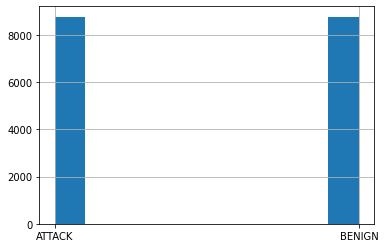

In [33]:
oversampled['Label'].hist();

## 1.1) Static solution

Feature Engineering

In [36]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
oversampled['Label']=le.fit_transform(oversampled['Label'])

In [ ]:
#! pip install numpy>=1.16.0 scikit-learn==0.20.2

In [37]:
def forward_selection(X,y):
    '''
    X          : a df except the label
    y          : a df of the label
    return     : a list of the selected features names.
    '''
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    sfs = SFS(LinearRegression(),
            k_features=10,
            forward=True,
            floating=False,
            scoring = 'r2',
            cv = 0)
    sfs.fit(X, y)
    return sfs.k_feature_names_  
features=forward_selection(oversampled.loc[:,oversampled.columns!='Label'],oversampled['Label'])
features

(' Fwd Packet Length Max',
 ' Bwd Packet Length Mean',
 ' Flow IAT Std',
 'Bwd IAT Total',
 ' Min Packet Length',
 ' Packet Length Std',
 ' ACK Flag Count',
 'Init_Win_bytes_forward',
 ' min_seg_size_forward',
 ' Idle Max')

In [122]:
df_selected=oversampled[[' Fwd Packet Length Std',
 ' Bwd Packet Length Std',
 ' Flow IAT Std',
 'Bwd IAT Total',
 ' Min Packet Length',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' ACK Flag Count',
 'Init_Win_bytes_forward',
 ' min_seg_size_forward','Label']]
# rename columns to remove the leading white space form the beginning of some columns
df_selected = df_selected.rename(columns={' Fwd Packet Length Std': 'Fwd Packet Length Std',
                                          ' Bwd Packet Length Std': 'Bwd Packet Length Std',
                                          ' Flow IAT Std':'Flow IAT Std',
                                          ' Min Packet Length':'Min Packet Length',
                                          ' ACK Flag Count':'ACK Flag Count',
                                          ' min_seg_size_forward':'min_seg_size_forward'
                                          })

In [125]:
le=LabelEncoder()
df_selected['Label']=le.fit_transform(df_selected['Label'])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components=pca.fit_transform(df_selected.values)
fig = px.scatter(components, x=0, y=1,color=df_selected['Label'])
fig.show()

In [39]:
df_selected['Fwd Packet Length Std']

0          0.000000
1          0.000000
2        142.492606
3        194.020617
4         97.234629
            ...    
17543    109.712568
17544    123.271673
17545    162.050711
17546      0.000000
17547     10.263203
Name: Fwd Packet Length Std, Length: 17548, dtype: float64

Kafka streaming gathering fot testing

In [ ]:
# Make sure that you have the dependency installed on your system
# If not installed, install by running the following
!pip install kafka-python

The code below needs to run multiple times as it shows error but while keep running it, it works.

In [126]:
import time
import json
from kafka import KafkaConsumer
consumer = KafkaConsumer(
    'task1', 
    bootstrap_servers="34.130.121.39:9092",
    sasl_plain_username="student",
    sasl_plain_password="uottawa",
    security_protocol="SASL_PLAINTEXT",
    sasl_mechanism="PLAIN",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)
i = 0
kafka=pd.DataFrame()
for message in consumer:
    #print(f"Consuming the {i+1}th data packet!")
    
    data_packet = message.value
    my_json = data_packet.decode('utf8').replace("'", '"')
    data = json.loads(my_json)
    kafka_df=pd.DataFrame.from_dict(data,orient='index')
    kafka_df=kafka_df.transpose()
    kafka=kafka.append(kafka_df)

    if i == 1000:
        break
        
    i += 1

In [40]:
kafka.head()

Destination Port   Flow Duration   Total Fwd Packets  \
20615                 80       115974116                   9   
13024                443         6111646                   9   
16499              49666        12002300                  11   
7362               51094              54                   1   
2383                 443        30161629                  11   

        Total Backward Packets  Total Length of Fwd Packets  \
20615                        6                          343   
13024                        6                          455   
16499                        6                          968   
7362                         1                            6   
2383                        12                          715   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
20615                         11595                     337   
13024                          3653                     214   
16499                           912                     248   
7362                              6                       6   
2383                           6691                     349   

        Fwd Packet Length Min   Fwd Packet Length Mean  \
20615                       0                38.111111   
13024                       0                50.555556   
16499                       0                88.000000   
7362                        6                 6.000000   
2383                        0                65.000000   

        Fwd Packet Length Std  ...   min_seg_size_forward  Active Mean  \
20615              112.100897  ...                     20    1991.0000   
13024               87.282746  ...                     32  602805.0000   
16499              116.484334  ...                     20       0.0000   
7362                 0.000000  ...                     20       0.0000   
2383               114.305730  ...                     20  418498.3333   

        Active Std   Active Max   Active Min   Idle Mean      Idle Std  \
20615       0.0000         1991         1991  58000000.0  5.930000e+07   
13024       0.0000       602805       602805   5508837.0  0.000000e+00   
16499       0.0000            0            0         0.0  0.000000e+00   
7362        0.0000            0            0         0.0  0.000000e+00   
2383   546848.4227      1046326        46125   9635377.0  6.230555e+05   

        Idle Max   Idle Min   Label  
20615   99900000   16000000  ATTACK  
13024    5508837    5508837  BENIGN  
16499          0          0  BENIGN  
7362           0          0  BENIGN  
2383     9995886    8915935  BENIGN  

[5 rows x 79 columns]

In [41]:
kafka.shape

(1000, 79)

In [60]:
# get the same attributes for test
df_test=kafka[['Fwd Packet Length Std',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Bwd IAT Total',
 'Min Packet Length',
 'Packet Length Variance',
 'FIN Flag Count',
 'ACK Flag Count',
 'Init_Win_bytes_forward',
 'min_seg_size_forward','Label']]

# label encoding
le=LabelEncoder()
df_test['Label']=le.fit_transform(df_test['Label'])

#get x test and y test
X_test=df_test.loc[:,df_test.columns!='Label']
y_test=df_test['Label']

<ipython-input-60-0330e41eca85>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



"\n#get x test and y test\nX_test=df_test.loc[:,df_test.columns!='Label']\ny_test=df_test['Label']\n"

In [62]:
df_test.head()

Fwd Packet Length Std   Bwd Packet Length Std   Flow IAT Std  \
20615              112.100897             2182.468304   2.670000e+07   
13024               87.282746              673.620788   1.461904e+06   
16499              116.484334              147.859393   2.987327e+06   
7362                 0.000000                0.000000   0.000000e+00   
2383               114.305730              728.994882   3.373265e+06   

       Bwd IAT Total   Min Packet Length   Packet Length Variance  \
20615           1041                   0             2.495303e+06   
13024         375277                   0             2.348075e+05   
16499            727                   0             1.602650e+04   
7362               0                   6             0.000000e+00   
2383        30100000                   0             3.247097e+05   

       FIN Flag Count   ACK Flag Count  Init_Win_bytes_forward  \
20615               0                1                     274   
13024               0                0                   29200   
16499               0                0                    8192   
7362                0                1                      29   
2383                0                0                    8192   

        min_seg_size_forward  Label  
20615                     20      0  
13024                     32      1  
16499                     20      1  
7362                      20      1  
2383                      20      1

# Random Forest

In [43]:
X=df_selected.loc[:,df_selected.columns!='Label']
y=df_selected['Label']

Baseline

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X,y)
y_pred=rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       175
           1       1.00      1.00      1.00       825

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      1.00      1000



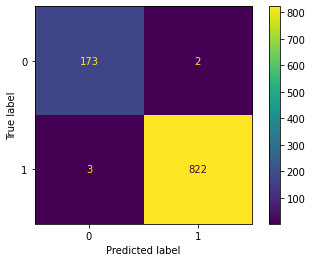

In [45]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

In [ ]:
#
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid = RandomizedSearchCV(rf, random_grid, n_jobs=-1, cv=3)
grid.fit(X,y)
grid.best_params_

In [46]:
rf=RandomForestClassifier(bootstrap=False,max_depth=20,
                          max_features='auto',min_samples_leaf=4,
                          min_samples_split=10,n_estimators=800)
rf.fit(X,y)


RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800)

In [47]:
y_pred=rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       175
           1       1.00      1.00      1.00       825

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000



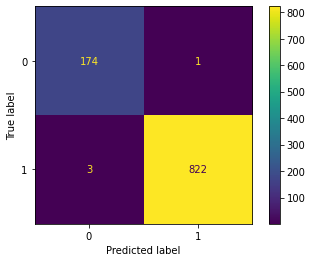

In [48]:
plot_confusion_matrix(rf, X_test, y_test);

## 1.2) Dynamic solution

Observe the label distribution in the kafka data frame

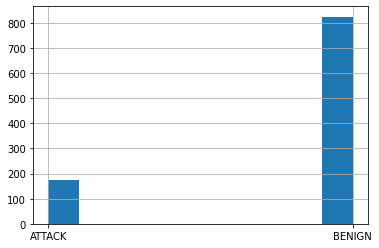

In [58]:
kafka.Label.hist();

We need to apply smote to the kafka df

In [59]:
oversampled=smote(kafka.loc[:,kafka.columns!='Label'],kafka['Label'])


In [63]:
# get the same attributes for test
df_test=kafka[['Fwd Packet Length Std',
 'Bwd Packet Length Std',
 'Flow IAT Std',
 'Bwd IAT Total',
 'Min Packet Length',
 'Packet Length Variance',
 'FIN Flag Count',
 'ACK Flag Count',
 'Init_Win_bytes_forward',
 'min_seg_size_forward','Label']]

# label encoding
le=LabelEncoder()
df_test['Label']=le.fit_transform(df_test['Label'])


<ipython-input-63-a1da56736de7>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
df_test.to_csv('kafka1.csv')

In [247]:

from skmultiflow.data import FileStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential


# 1. Create a stream
stream = FileStream("kafka1.csv")

# 2. Instantiate the HoeffdingTreeClassifier
ht = HoeffdingTreeClassifier()

# 3. Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=10,
                                 max_samples=10000000
                                 ,output_file='intrusion.csv')

# 4. Run evaluation
evaluator.evaluate(stream=stream, model=ht)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 10 sample(s).
Evaluating...
 #################### [100%] [0.46s][80%] [0.37s]
Processed samples: 1000
Mean performance:
M0 - Accuracy     : 0.8818
M0 - Kappa        : 0.5389


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [103]:
data=[
    [199,0.842105,0.842105,0.361702,0.361702],
    [399,0.858974,0.875000,0.435497,0.504950],
    [599,0.872881,0.900000,0.490689,0.598716],
    [799,0.882278,0.910000,0.544157,0.681979],
    [999,0.881818,0.880000,0.538941,0.517588]
     ]

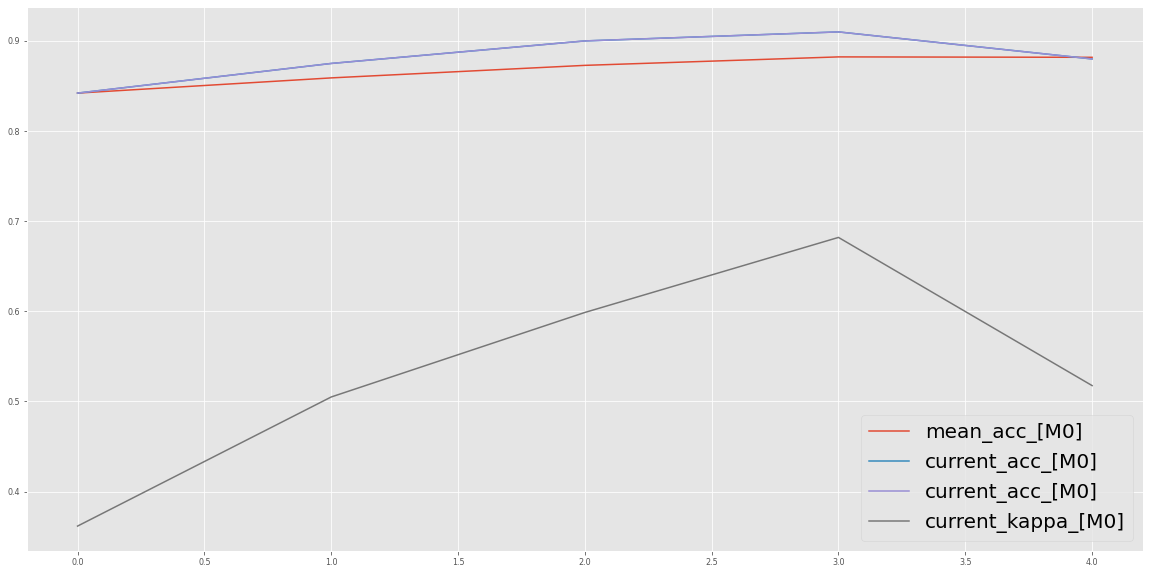

In [114]:
plot1=pd.DataFrame(data,columns=["id","mean_acc_[M0]","current_acc_[M0]","mean_kappa_[M0]","current_kappa_[M0]"]
)
plt.figure(figsize=(20,10));
plot1["mean_acc_[M0]"].plot();
plot1["current_acc_[M0]"].plot();
plot1["current_acc_[M0]"].plot();
plot1["current_kappa_[M0]"].plot();
plt.legend(prop={"size":20});

In [111]:
ht.get_params()

{'binary_split': False,
 'grace_period': 200,
 'leaf_prediction': 'nba',
 'max_byte_size': 33554432,
 'memory_estimate_period': 1000000,
 'nb_threshold': 0,
 'no_preprune': False,
 'nominal_attributes': None,
 'remove_poor_atts': False,
 'split_confidence': 1e-07,
 'split_criterion': 'info_gain',
 'stop_mem_management': False,
 'tie_threshold': 0.05}

# 2) IOT Botnet Attack Detection

Multiclass classification to
predict is the case is normal or a specific type of attack.

In [139]:
df=pd.read_csv('iot_static_data.csv')

In [140]:
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0         19.570634      152.679121        39991.937640         20.937891   
1         49.893840      169.297843        54532.338720         62.957476   
2          1.996527      449.011775          409.365474          2.002395   
3          1.000000       60.000018            0.004849          1.000065   
4        100.707918      226.708372        54562.182272        155.736482   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0      150.455024        38960.674060         23.168006      145.454142   
1      169.735104        54283.995040         82.340884      168.919514   
2      448.141152          739.076602          2.166552      419.128740   
3       60.017569            4.743299          1.063813       76.195918   
4      252.269792        58012.457557        446.854937      301.030305   

   MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_pcc  \
0        36954.215040           33.115077  ...       0.468843   
1        53449.819730           98.214224  ...       0.000000   
2        11039.485060            4.621621  ...       0.000000   
3         4110.590208            2.936177  ...       0.000000   
4        60959.734097         4257.526218  ...       0.000000   

   HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  HpHp_L0.01_magnitude  \
0           4.999756       181.799689    2.276210e+02            290.439555   
1           1.999960        69.999921    4.000000e+00            101.862598   
2          14.978833       455.354366    1.959295e+01            455.354366   
3           7.290294        60.000000    9.540000e-07             84.852814   
4           1.000000       554.000000    0.000000e+00            554.000000   

   HpHp_L0.01_radius  HpHp_L0.01_covariance  HpHp_L0.01_pcc  \
0       5.957202e+04           1.831480e+04    4.692557e-01   
1       1.600000e+01           0.000000e+00    0.000000e+00   
2       3.838837e+02           0.000000e+00    0.000000e+00   
3       1.290000e-12           8.690000e-30    9.560000e-18   
4       0.000000e+00           0.000000e+00    0.000000e+00   

                                     Source             Class  
0          Provision PT 838 Security Camera            BENIGN  
1         Provision PT 737E Security Camera            BENIGN  
2                 Samsung SNH 1011 N Webcam            BENIGN  
3  SimpleHome XCS7 1002 WHT Security Camera            BENIGN  
4          Provision PT 838 Security Camera  mirai_udp_attack  

[5 rows x 117 columns]

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25609 entries, 0 to 25608
Columns: 117 entries, MI_dir_L5_weight to Class
dtypes: float64(115), object(2)
memory usage: 22.9+ MB


In [142]:
df['Source']

0                Provision PT 838 Security Camera
1               Provision PT 737E Security Camera
2                       Samsung SNH 1011 N Webcam
3        SimpleHome XCS7 1002 WHT Security Camera
4                Provision PT 838 Security Camera
                           ...                   
25604                   Samsung SNH 1011 N Webcam
25605            Provision PT 838 Security Camera
25606                Philips B120N10 Baby Monitor
25607            Provision PT 838 Security Camera
25608                Philips B120N10 Baby Monitor
Name: Source, Length: 25609, dtype: object

In [143]:
df.select_dtypes(include='object')

Source             Class
0              Provision PT 838 Security Camera            BENIGN
1             Provision PT 737E Security Camera            BENIGN
2                     Samsung SNH 1011 N Webcam            BENIGN
3      SimpleHome XCS7 1002 WHT Security Camera            BENIGN
4              Provision PT 838 Security Camera  mirai_udp_attack
...                                         ...               ...
25604                 Samsung SNH 1011 N Webcam            BENIGN
25605          Provision PT 838 Security Camera            BENIGN
25606              Philips B120N10 Baby Monitor            BENIGN
25607          Provision PT 838 Security Camera            BENIGN
25608              Philips B120N10 Baby Monitor            BENIGN

[25609 rows x 2 columns]

In [144]:
df.drop(columns=['Source'],inplace=True)

In [145]:
df.shape

(25609, 116)

In [146]:
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0         19.570634      152.679121        39991.937640         20.937891   
1         49.893840      169.297843        54532.338720         62.957476   
2          1.996527      449.011775          409.365474          2.002395   
3          1.000000       60.000018            0.004849          1.000065   
4        100.707918      226.708372        54562.182272        155.736482   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0      150.455024        38960.674060         23.168006      145.454142   
1      169.735104        54283.995040         82.340884      168.919514   
2      448.141152          739.076602          2.166552      419.128740   
3       60.017569            4.743299          1.063813       76.195918   
4      252.269792        58012.457557        446.854937      301.030305   

   MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  \
0        36954.215040           33.115077  ...          1.829905e+04   
1        53449.819730           98.214224  ...          0.000000e+00   
2        11039.485060            4.621621  ...          0.000000e+00   
3         4110.590208            2.936177  ...         -4.150000e-39   
4        60959.734097         4257.526218  ...          0.000000e+00   

   HpHp_L0.1_pcc  HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
0       0.468843           4.999756       181.799689    2.276210e+02   
1       0.000000           1.999960        69.999921    4.000000e+00   
2       0.000000          14.978833       455.354366    1.959295e+01   
3       0.000000           7.290294        60.000000    9.540000e-07   
4       0.000000           1.000000       554.000000    0.000000e+00   

   HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
0            290.439555       5.957202e+04           1.831480e+04   
1            101.862598       1.600000e+01           0.000000e+00   
2            455.354366       3.838837e+02           0.000000e+00   
3             84.852814       1.290000e-12           8.690000e-30   
4            554.000000       0.000000e+00           0.000000e+00   

   HpHp_L0.01_pcc             Class  
0    4.692557e-01            BENIGN  
1    0.000000e+00            BENIGN  
2    0.000000e+00            BENIGN  
3    9.560000e-18            BENIGN  
4    0.000000e+00  mirai_udp_attack  

[5 rows x 116 columns]

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25609 entries, 0 to 25608
Columns: 116 entries, MI_dir_L5_weight to Class
dtypes: float64(115), object(1)
memory usage: 22.7+ MB


In [148]:
df.shape


(25609, 116)

In [18]:
#!pip install missingno

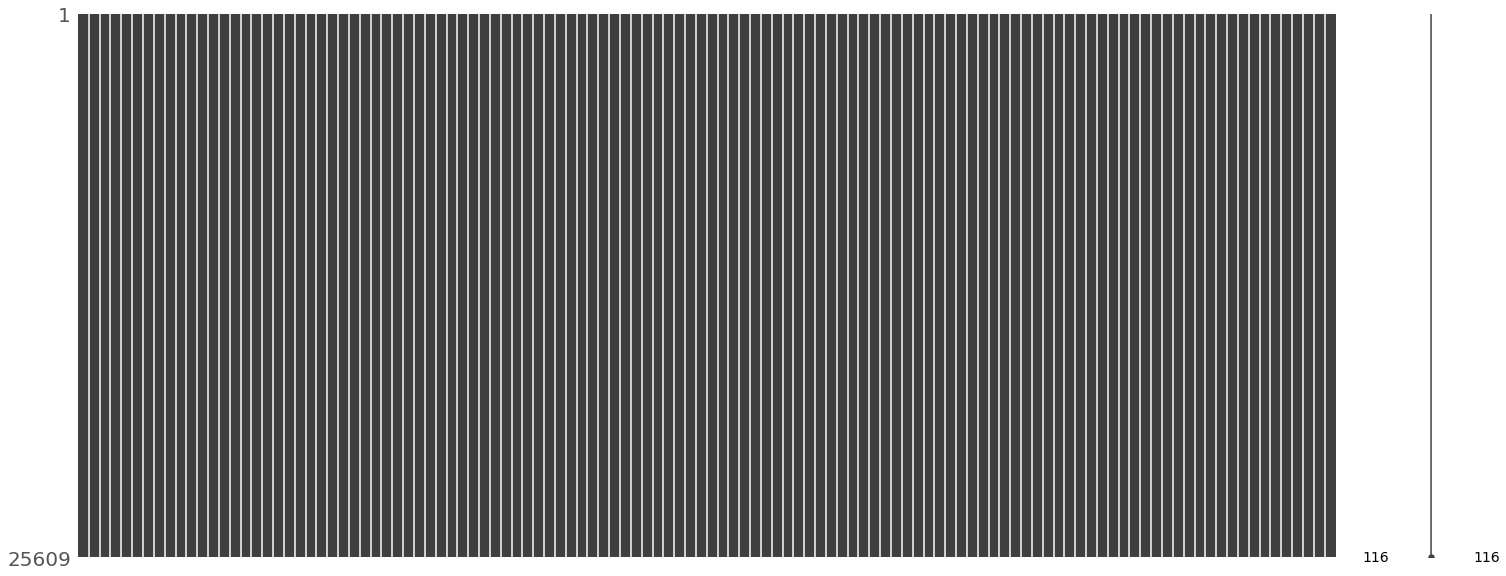

In [149]:
# plot missing values
import missingno as msno
%matplotlib inline
msno.matrix(df);

In [150]:
# remove nans or infinity in numeric columns
df=df[df.select_dtypes(include=[np.number]).ge(0).all(1)]
df = df.replace(' ', np.nan)
df.replace([np.inf, -np.inf], np.nan , inplace=True)
# drop nans and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [168]:
df.shape

(7557, 116)

In [152]:
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
2           1.996527      449.011775        4.093655e+02          2.002395   
4         100.707918      226.708372        5.456218e+04        155.736482   
6           1.000000      429.000000        4.660000e-10          1.000000   
8          95.930348      501.697575        2.840223e+04        169.223400   
11         72.807027      274.695602        5.995243e+04        112.702453   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
2       448.141152          739.076602          2.166552      419.128740   
4       252.269792        58012.457557        446.854937      301.030305   
6       428.999999            0.000277          1.001334      428.512623   
8       477.585261        36920.691888        572.815448      424.833770   
11      313.004154        60955.273671        341.176369      337.161681   

    MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  \
2         11039.485060            4.621621  ...                   0.0   
4         60959.734097         4257.526218  ...                   0.0   
6           178.598480            2.765512  ...                   0.0   
8         51502.180211         6216.639571  ...                   0.0   
11        60076.345859         3719.720063  ...                   0.0   

    HpHp_L0.1_pcc  HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
2             0.0          14.978833       455.354366       19.592951   
4             0.0           1.000000       554.000000        0.000000   
6             0.0          13.976869       454.377913       19.926749   
8             0.0           1.000000        60.000000        0.000000   
11            0.0           1.000000        60.000000        0.000000   

    HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
2             455.354366         383.883710                    0.0   
4             554.000000           0.000000                    0.0   
6             454.377913         397.075337                    0.0   
8              60.000000           0.000000                    0.0   
11             60.000000           0.000000                    0.0   

    HpHp_L0.01_pcc             Class  
2              0.0            BENIGN  
4              0.0  mirai_udp_attack  
6              0.0            BENIGN  
8              0.0  mirai_ack_attack  
11             0.0  mirai_udp_attack  

[5 rows x 116 columns]

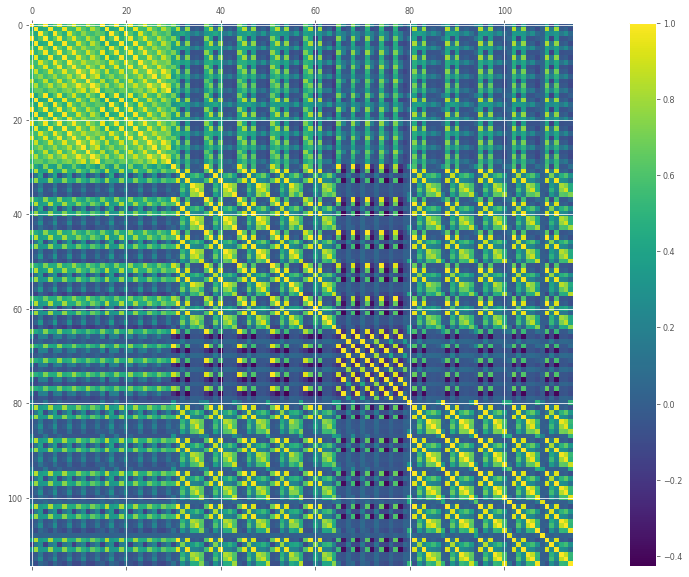

In [153]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
fig = plt.figure(figsize=(20,10));
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr());
fig.colorbar(cax);

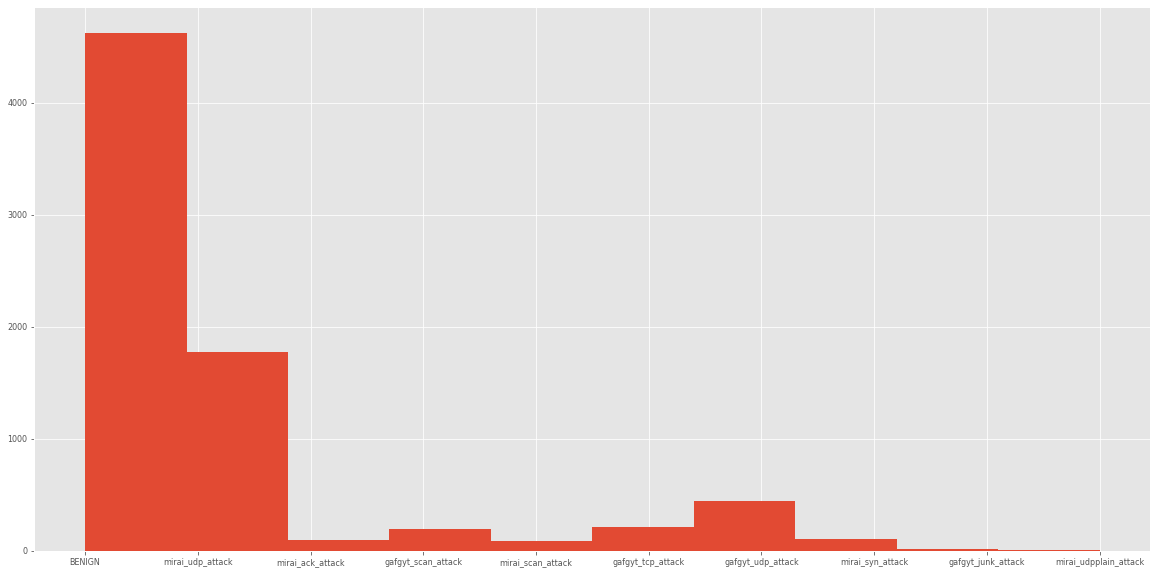

In [156]:
plt.figure(figsize=(20,10))
df['Class'].hist();

In [ ]:
#!pip install imblearn

In [175]:
def smote(X,y):
    '''
    X      : the data frame without any label.
    y      : the data frame of the label.
    returns: the oversampled data frame. 
    '''

    from imblearn.over_sampling import SMOTE
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    oversampled=pd.DataFrame(X)
    oversampled['Label']=y
    return oversampled
oversampled=smote(df.loc[:,df.columns!='Class'],df['Class'])
oversampled.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0        100.707918      226.708372        5.456218e+04        155.736482   
1          1.000000      429.000000        4.660000e-10          1.000000   
2         95.930348      501.697575        2.840223e+04        169.223400   
3         72.807027      274.695602        5.995243e+04        112.702453   
4          1.000000       60.000000        0.000000e+00          1.000000   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0      252.269792        58012.457557        446.854937      301.030305   
1      428.999999            0.000277          1.001334      428.512623   
2      477.585261        36920.691888        572.815448      424.833770   
3      313.004154        60955.273671        341.176369      337.161681   
4       60.000000            0.000000          1.000004       60.000085   

   MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  \
0        60959.734097         4257.526218  ...                   0.0   
1          178.598480            2.765512  ...                   0.0   
2        51502.180211         6216.639571  ...                   0.0   
3        60076.345859         3719.720063  ...                   0.0   
4            0.002539            2.439305  ...                   0.0   

   HpHp_L0.1_pcc  HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
0            0.0           1.000000       554.000000    0.000000e+00   
1            0.0          13.976869       454.377913    1.992675e+01   
2            0.0           1.000000        60.000000    0.000000e+00   
3            0.0           1.000000        60.000000    0.000000e+00   
4            0.0           3.378892        60.000000    6.740000e-07   

   HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
0            554.000000       0.000000e+00                    0.0   
1            454.377913       3.970753e+02                    0.0   
2             60.000000       0.000000e+00                    0.0   
3             60.000000       0.000000e+00                    0.0   
4             60.000000       4.550000e-13                    0.0   

   HpHp_L0.01_pcc             Label  
0             0.0  mirai_udp_attack  
1             0.0            BENIGN  
2             0.0  mirai_ack_attack  
3             0.0  mirai_udp_attack  
4             0.0            BENIGN  

[5 rows x 116 columns]

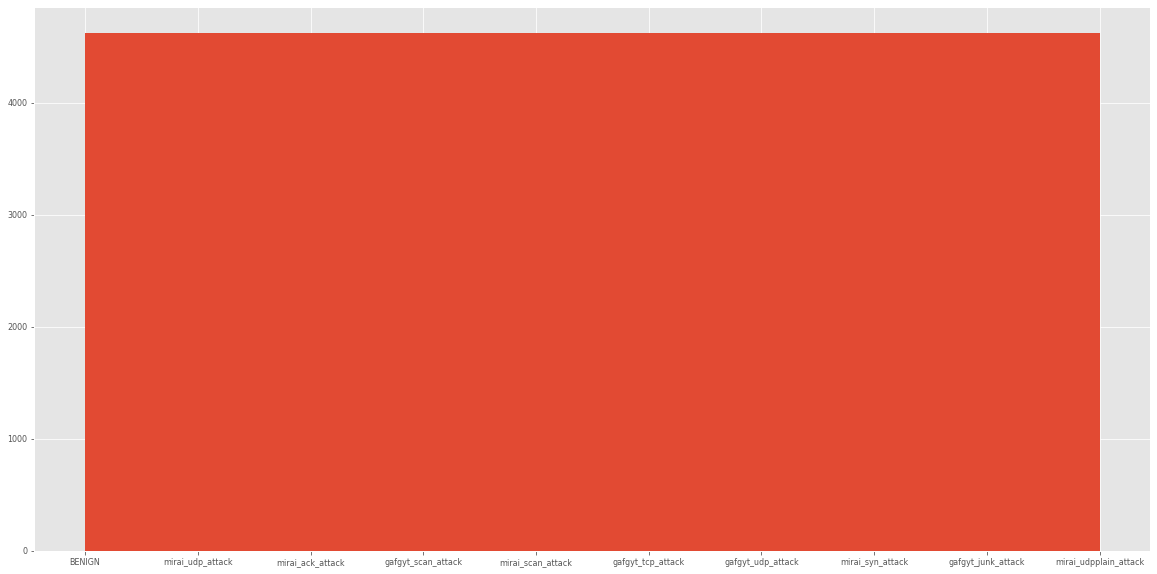

In [161]:
plt.figure(figsize=(20,10))

oversampled['Label'].hist();

## 1.1) Static solution

Feature Engineering

In [176]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
oversampled['Label']=le.fit_transform(oversampled['Label'])

In [ ]:
#! pip install numpy>=1.16.0 scikit-learn==0.20.2

In [177]:
def forward_selection(X,y):
    '''
    X          : a df except the label
    y          : a df of the label
    return     : a list of the selected features names.
    '''
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    sfs = SFS(LinearRegression(),
            k_features=10,
            forward=True,
            floating=False,
            scoring = 'r2',
            cv = 0)
    sfs.fit(X, y)
    return sfs.k_feature_names_  
features=forward_selection(oversampled.loc[:,oversampled.columns!='Label'],oversampled['Label'])
features

('MI_dir_L5_variance',
 'MI_dir_L1_variance',
 'MI_dir_L0.01_weight',
 'MI_dir_L0.01_mean',
 'HH_L5_std',
 'HH_L0.01_magnitude',
 'HH_jit_L5_mean',
 'HH_jit_L3_mean',
 'HpHp_L1_mean',
 'HpHp_L0.1_weight')

In [178]:
df_selected=oversampled[['MI_dir_L5_variance',
 'MI_dir_L1_variance',
 'MI_dir_L0.01_weight',
 'H_L1_mean',
 'HH_L1_mean',
 'HH_L0.01_magnitude',
 'HH_jit_L5_mean',
 'HH_jit_L3_mean',
 'HpHp_L0.1_weight',
 'HpHp_L0.01_weight','Label']]


In [179]:
df_selected.head()

MI_dir_L5_variance  MI_dir_L1_variance  MI_dir_L0.01_weight   H_L1_mean  \
0        5.456218e+04        60959.734097         24034.070444  301.030305   
1        4.660000e-10          178.598480            27.168367  428.512623   
2        2.840223e+04        51502.180211         37950.689346  424.833770   
3        5.995243e+04        60076.345859         37818.256433  337.161681   
4        0.000000e+00            0.002539            25.916684   60.000085   

   HH_L1_mean  HH_L0.01_magnitude  HH_jit_L5_mean  HH_jit_L3_mean  \
0  553.999298          553.813218    9.055091e-03    8.280264e-03   
1  429.000000          454.377913    3.000610e+01    3.000610e+01   
2   60.000000           60.000000    1.507658e+09    1.507658e+09   
3   60.000000           60.000000    1.507656e+09    1.507656e+09   
4   60.000000           60.000000    1.812372e+02    1.812372e+02   

   HpHp_L0.1_weight  HpHp_L0.01_weight  Label  
0          1.000000           1.000000      8  
1          1.428326          13.976869      0  
2          1.000000           1.000000      5  
3          1.000000           1.000000      8  
4          1.000018           3.378892      0

In [167]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components=pca.fit_transform(df_selected.values)
fig = px.scatter(components, x=0, y=1,color=df_selected['Label'])
fig.show()

Kafka streaming gathering fot testing

In [ ]:
# Make sure that you have the dependency installed on your system
# If not installed, install by running the following
!pip install kafka-python

The code below needs to run multiple times as it shows error but while keep running it, it works.

In [126]:
import time
import json
from kafka import KafkaConsumer
consumer = KafkaConsumer(
    'task2', 
    bootstrap_servers="34.130.121.39:9092",
    sasl_plain_username="student",
    sasl_plain_password="uottawa",
    security_protocol="SASL_PLAINTEXT",
    sasl_mechanism="PLAIN",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)
i = 0
kafka=pd.DataFrame()
for message in consumer:
    #print(f"Consuming the {i+1}th data packet!")
    
    data_packet = message.value
    my_json = data_packet.decode('utf8').replace("'", '"')
    data = json.loads(my_json)
    kafka_df=pd.DataFrame.from_dict(data,orient='index')
    kafka_df=kafka_df.transpose()
    kafka=kafka.append(kafka_df)

    if i == 1000:
        break
        
    i += 1

In [180]:
kafka.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
23139         54.466381       70.882725           33.941085        106.725779   
9470           2.091083       89.232773           12.462763          2.248254   
9446           1.000175       74.017799           10.667648          1.032992   
8015         105.910087      500.999266        23373.268236        187.115649   
21946          8.231704       78.014822         1225.781130          8.978920   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
23139       69.356978           43.513401        393.016621       68.275475   
9470        88.114849           29.164867          3.276378       83.774507   
9446        77.216687         2036.658956          7.802930      159.974704   
8015       458.792245        37967.854321        607.275754      407.026990   
21946       78.363230         1275.410417         10.527578       77.447823   

       MI_dir_L1_variance  MI_dir_L0.1_weight  ...  HpHp_L0.1_covariance  \
23139           47.531561         3750.615568  ...               0.00000   
9470           105.945722            8.462374  ...               7.33218   
9446         48334.763250           84.208071  ...               0.00000   
8015         51001.362622         6334.855386  ...               0.00000   
21946         1256.557245           19.957534  ...               0.00000   

       HpHp_L0.1_pcc  HpHp_L0.01_weight  HpHp_L0.01_mean  HpHp_L0.01_std  \
23139       0.000000           1.000000         74.00000        0.000000   
9470        0.537788           6.405647         84.47143       11.631509   
9446        0.000000           1.000000         74.00000        0.000000   
8015        0.000000           1.000000        554.00000        0.000000   
21946       0.000000           1.999940         69.99988        4.000000   

       HpHp_L0.01_magnitude  HpHp_L0.01_radius  HpHp_L0.01_covariance  \
23139             74.000000           0.000000               0.000000   
9470             103.987752         135.294843               2.948515   
9446              74.000000           0.000000               0.000000   
8015             554.000000           0.000000               0.000000   
21946            101.862570          16.000000               0.000000   

       HpHp_L0.01_pcc             Class  
23139        0.000000  mirai_syn_attack  
9470         0.270961            BENIGN  
9446         0.000000            BENIGN  
8015         0.000000  mirai_udp_attack  
21946        0.000000            BENIGN  

[5 rows x 116 columns]

In [181]:
kafka.shape

(1000, 116)

In [191]:
# get the same attributes for test
df_test=kafka[['MI_dir_L5_variance',
 'MI_dir_L1_variance',
 'MI_dir_L0.01_weight',
 'H_L1_mean',
 'HH_L1_mean',
 'HH_L0.01_magnitude',
 'HH_jit_L5_mean',
 'HH_jit_L3_mean',
 'HpHp_L0.1_weight',
 'HpHp_L0.01_weight','Class']]
# label encoding
le=LabelEncoder()
df_test['Class']=le.fit_transform(df_test['Class'])

#get x test and y test
X_test=df_test.loc[:,df_test.columns!='Class']
y_test=df_test['Class']

<ipython-input-191-137b47f69618>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [192]:
df_test.head()

MI_dir_L5_variance  MI_dir_L1_variance  MI_dir_L0.01_weight  \
23139           33.941085           47.531561         25283.990832   
9470            12.462763          105.945722            31.087936   
9446            10.667648        48334.763250           136.554207   
8015         23373.268236        51001.362622         55295.503758   
21946         1225.781130         1256.557245            47.760488   

        H_L1_mean  HH_L1_mean  HH_L0.01_magnitude  HH_jit_L5_mean  \
23139   68.275475   73.978667           73.986897        0.007285   
9470    83.774507   87.316006          103.987752        3.198228   
9446   159.974704   74.000000           74.000000        4.137739   
8015   407.026990  554.000000          553.960275        0.003145   
21946   77.447823   81.182621          341.041977        1.181036   

       HH_jit_L3_mean  HpHp_L0.1_weight  HpHp_L0.01_weight  Class  
23139        0.007064          1.000000           1.000000      7  
9470         3.222307          2.748143           6.405647      0  
9446         4.137337          1.000000           1.000000      0  
8015         0.003270          1.000000           1.000000      8  
21946        1.276528          1.999400           1.999940      0

# Random Forest

In [193]:
X=df_selected.loc[:,df_selected.columns!='Label']
y=df_selected['Label']

Baseline

In [194]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X,y)
y_pred=rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       599
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        25
           3       1.00      0.96      0.98        26
           4       0.99      1.00      0.99        69
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00       237
           9       1.00      1.00      1.00         1

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



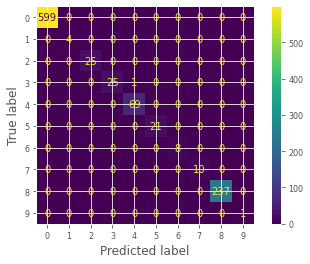

In [195]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

In [196]:
#
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid = RandomizedSearchCV(rf, random_grid, n_jobs=-1, cv=3)
grid.fit(X,y)
grid.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [197]:
rf=RandomForestClassifier(bootstrap=False,max_depth=50,
                          max_features='sqrt',min_samples_leaf=1,
                          min_samples_split=5,n_estimators=1200)
rf.fit(X,y)


RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_split=5, n_estimators=1200)

In [198]:
y_pred=rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       599
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        25
           3       1.00      0.96      0.98        26
           4       0.99      1.00      0.99        69
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00       237
           9       1.00      1.00      1.00         1

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



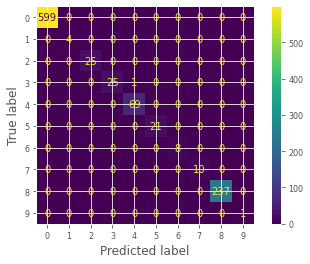

In [199]:
plot_confusion_matrix(rf, X_test, y_test);

## 1.2) Dynamic solution

Observe the label distribution in the kafka data frame

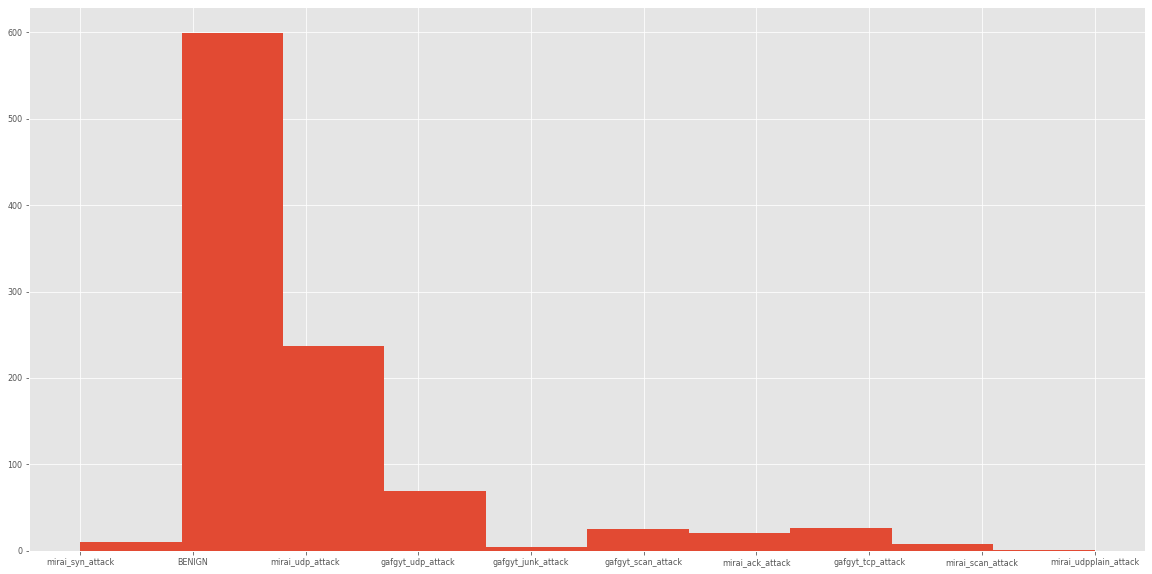

In [202]:
plt.figure(figsize=(20,10))
kafka.Class.hist();

We need to apply smote to the kafka df

In [239]:
oversampled=smote(kafka.loc[:,kafka.columns!='Class'],kafka['Class'])


In [241]:
# get the same attributes for test
df_test=kafka[['MI_dir_L5_variance',
 'MI_dir_L1_variance',
 'MI_dir_L0.01_weight',
 'H_L1_mean',
 'HH_L1_mean',
 'HH_L0.01_magnitude',
 'HH_jit_L5_mean',
 'HH_jit_L3_mean',
 'HpHp_L0.1_weight',
 'HpHp_L0.01_weight','Class']]

# label encoding
le=LabelEncoder()
df_test['Class']=le.fit_transform(df_test['Class'])


<ipython-input-241-da4d74771650>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [242]:
df_test.to_csv('kafka2.csv')

In [244]:

from skmultiflow.data import FileStream
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential


# 1. Create a stream
stream = FileStream("kafka2.csv")

# 2. Instantiate the HoeffdingTreeClassifier
ht = HoeffdingTreeClassifier()

# 3. Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=10,
                                 max_samples=10000000
                                 ,output_file='iot.csv')

# 4. Run evaluation
evaluator.evaluate(stream=stream, model=ht)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 10 sample(s).
Evaluating...
 #################### [100%] [0.97s]
Processed samples: 1000
Mean performance:
M0 - Accuracy     : 0.9283
M0 - Kappa        : 0.8778


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [245]:
data=[
[199,0.915789,0.915789,0.852542,0.852542],
[399,0.941026,0.965000,0.898375,0.940582],
[599,0.940678,0.940000,0.897547,0.895593],
[799,0.925316,0.880000,0.870954,0.792666],
[999,0.928283,0.940000,0.877811,0.902041]
     ]

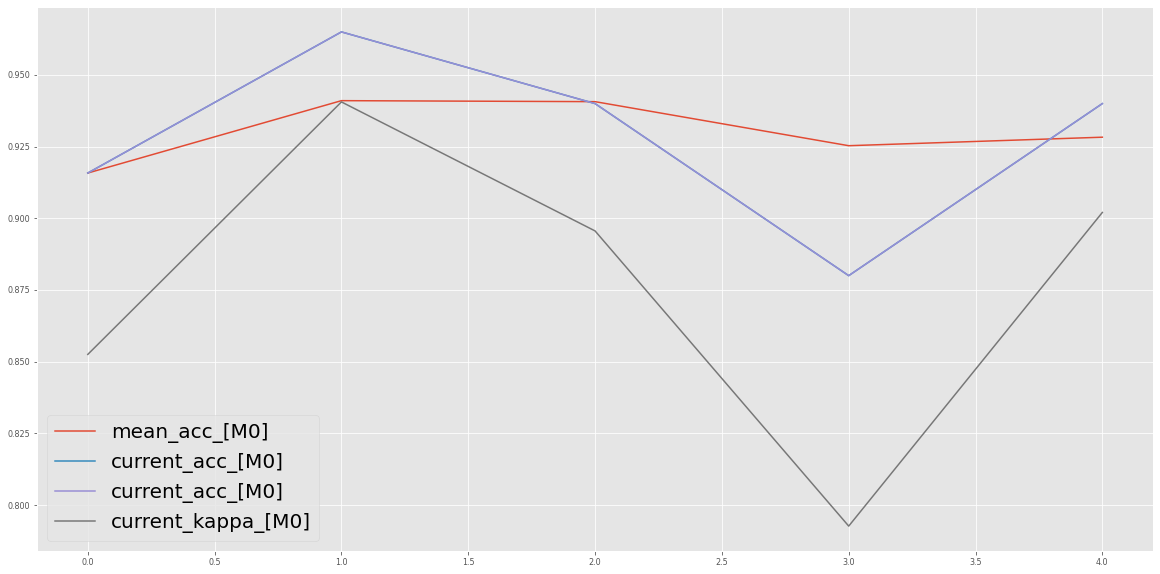

In [246]:
plot1=pd.DataFrame(data,columns=["id","mean_acc_[M0]","current_acc_[M0]","mean_kappa_[M0]","current_kappa_[M0]"]
)
plt.figure(figsize=(20,10));
plot1["mean_acc_[M0]"].plot();
plot1["current_acc_[M0]"].plot();
plot1["current_acc_[M0]"].plot();
plot1["current_kappa_[M0]"].plot();
plt.legend(prop={"size":20});